# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [73]:
import pandas as pd

In [74]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [75]:
pd.read_excel("KyotoFullFlower7.xls") 

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1235,2011,99,409,8,0,NEWS-PAPER(ARASHIYAMA)
1236,2012,101,410,8,0,NEWS-PAPER(ARASHIYAMA)
1237,2013,93,403,8,0,NEWS-PAPER(ARASHIYAMA)
1238,2014,94,404,8,0,NEWS-PAPER(ARASHIYAMA)


## 1. Read in the file using pandas, and look at the first five rows

In [76]:
df = pd.read_excel("KyotoFullFlower7.xls") 

In [77]:
df.head()

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [78]:
df=pd.read_excel("KyotoFullFlower7.xls", skiprows=25)
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 3. Look at the final five rows of the data

In [79]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [80]:
import numpy as np

In [81]:
df['Reference Name'] = df['Reference Name'].replace('-', np.nan)

In [82]:
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 5. What source is the most common as a reference?

In [83]:
df['Reference Name']. value_counts(dropna=False)

NaN                        390
NEWS-PAPER(ARASHIYAMA)      94
SUGIURAKE-NIKKI             38
MYOHOIN-HINAMIKI            32
OYUDONONO-UENO-NIKKI        26
                          ... 
GYOUKO-HOIN-NIKKI            1
GAUN-NIKKENROKU-BATSUYU      1
EST-from-WF(GOHOKOINKI)      1
HEKIZAN-NICHIROKU            1
NEWS-PAPET(DAIGO-JI)         1
Name: Reference Name, Length: 223, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [84]:
df['Full-flowering date (DOY)'] == 'NaN'

0       False
1       False
2       False
3       False
4       False
        ...  
1210    False
1211    False
1212    False
1213    False
1214    False
Name: Full-flowering date (DOY), Length: 1215, dtype: bool

In [85]:
df = df.dropna(subset=['Full-flowering date (DOY)'])

In [86]:
df['Full-flowering date (DOY)']

11       92.0
14      105.0
30       96.0
50      108.0
52      104.0
        ...  
1210     99.0
1211    101.0
1212     93.0
1213     94.0
1214     93.0
Name: Full-flowering date (DOY), Length: 827, dtype: float64

## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

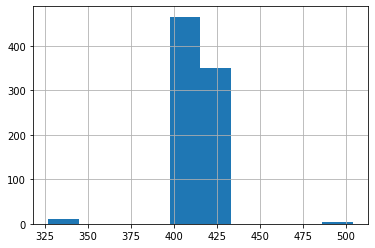

In [87]:
df['Full-flowering date'].hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

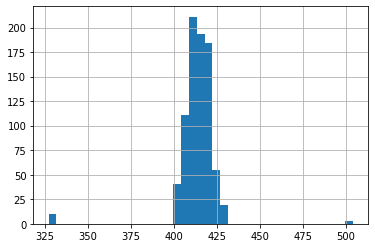

In [88]:
df['Full-flowering date'].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [89]:
df['Full-flowering date (DOY)'].describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [90]:
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


In [91]:
df[df['AD']<1900]['Full-flowering date (DOY)'].mean()

105.20728291316527

## 11. How about after 1900?

In [92]:
df[df['AD']>1900]['Full-flowering date (DOY)'].mean()

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [93]:
df[df['Data type code']==4]['Data type code'].count()

39

## 13. Show only the years where our data was from a title in Japanese poetry

In [94]:
df[df['Data type code']==4]['AD']

90       891
94       895
95       896
122      923
154      955
168      969
206     1007
232     1033
235     1036
259     1060
260     1061
283     1084
294     1095
381     1182
389     1190
400     1201
415     1216
418     1219
420     1221
422     1223
435     1236
464     1265
467     1268
468     1269
470     1271
488     1289
500     1301
523     1324
529     1330
646     1447
652     1453
653     1454
673     1474
733     1534
791     1592
839     1640
860     1661
1045    1846
1062    1863
Name: AD, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:>

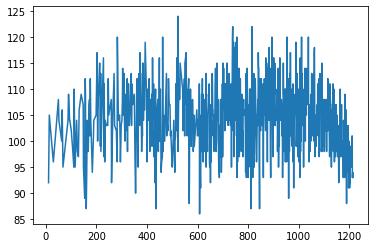

In [95]:
df['Full-flowering date (DOY)'].plot(x='AD', y='Full-flowering date (DOY)')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [96]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full-flowering date (DOY), dtype: float64

In [97]:
df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    96.45
1211    96.80
1212    96.60
1213    96.35
1214    96.05
Name: Full-flowering date (DOY), dtype: float64

In [98]:
df.rolling_date=df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()

/var/folders/32/0w52m10j7fvd2gmsgc11sprw0000gn/T/ipykernel_1117/3983986152.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.rolling_date=df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()


<AxesSubplot:>

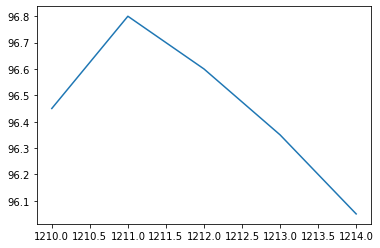

In [99]:
df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail().plot(x='AD', y='Full-flowering date (DOY)')

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [100]:
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'

/Users/egads/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/egads/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### 17. Using your new column, how many blossomings happened in each month?

### 18. Graph how many blossomings happened in each month.

### 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.` It might be a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

*Tip: If your method involves `.astype(int)` it isn't going to work since it's missing data, you can add `.dropna().astype(int)` instead.*

### 20. Adding a date column

If you don't have one yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. You could alternatively use `.dt.strftime` as mentioned above.

# YOU ARE DONE.

And **incredible.**